# Regresión lineal

In [276]:
pip install seaborn

     -------------------------------------- 288.2/288.2 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [66]:
import pandas as pd
import numpy as np
import matplotlib

Carga de archivo

In [236]:
df = pd.read_csv('balance.csv')
df.head(5)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


Matriz de dispersión de variables

In [4]:
df.describe()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,115.614301,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,1.000000,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,100.750000,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,200.500000,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,300.250000,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,400.000000,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


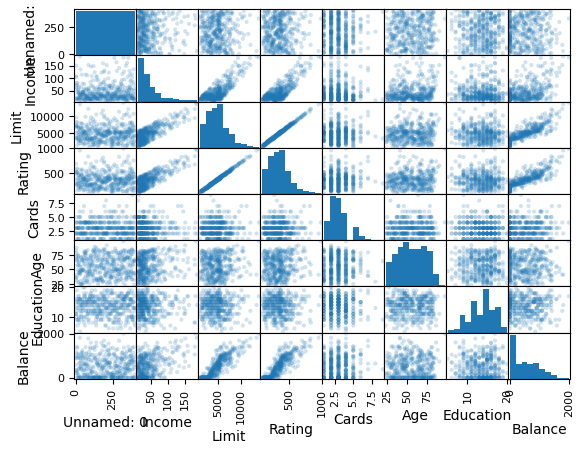

In [5]:
pd.plotting.scatter_matrix(df, alpha=0.2);


Reemplazo por dummies

In [6]:
df.head(1)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333


In [7]:
print(df.dtypes)

Unnamed: 0      int64
Income        float64
Limit           int64
Rating          int64
Cards           int64
Age             int64
Education       int64
Gender         object
Student        object
Married        object
Ethnicity      object
Balance         int64
dtype: object


In [237]:
df = pd.get_dummies(df, columns = ['Gender', 'Married', 'Student', 'Ethnicity'], prefix=None)
df.head(1)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender_ Male,Gender_Female,Married_No,Married_Yes,Student_No,Student_Yes,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,1,14.891,3606,283,2,34,11,333,1,0,0,1,1,0,0,0,1


Cambiando nombre de dummies

In [238]:
df.rename(columns={"Gender_ Male":"Gender", "Married_No":"Married", "Student_No":"Student", "Ethnicity_Asian":"Asian", "Ethnicity_Caucasian":"Caucasian"}, inplace = True)

In [239]:
df.head(1)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender,Gender_Female,Married,Married_Yes,Student,Student_Yes,Ethnicity_African American,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,333,1,0,0,1,1,0,0,0,1


Quitando columnas que tienen un _

In [240]:
df = df[df.columns.drop(list(df.filter(regex='_')))]

In [74]:
df.head(1)

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender,Married,Student,Asian,Caucasian
0,1,14.891,3606,283,2,34,11,333,1,0,1,0,1


Entrenamiento y prueba

In [241]:
n = len(df)
n_holdout = int(n*0.2)
print( f"{n} registros, ocultaremos {n_holdout}" )

400 registros, ocultaremos 80


Aleatorizaremos los datos por medio de la instrución [.sample()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html)

In [242]:
df = df.sample(len(df))
df_test = df.iloc[:n_holdout]
df_train = df.iloc[n_holdout:]

Regresión lineal

In [243]:
from sklearn.linear_model import LinearRegression

#initiate linear regression model
model = LinearRegression()

#define predictor and response variables
X, y = df_train[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian"]], df_train.Balance

#fit regression model
model.fit(X, y)

LinearRegression()

R^2

In [244]:
X_test, y_test = df_test[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian"]], df_test.Balance

#calculate R-squared of regression model
r_squared = model.score(X_test, y_test)

#view R-squared value
print(r_squared)

0.9562681566674025


Y estimada (hat)

In [235]:
yhat = model.predict(X_test)

Gráfico

In [80]:
import matplotlib.pyplot as plt

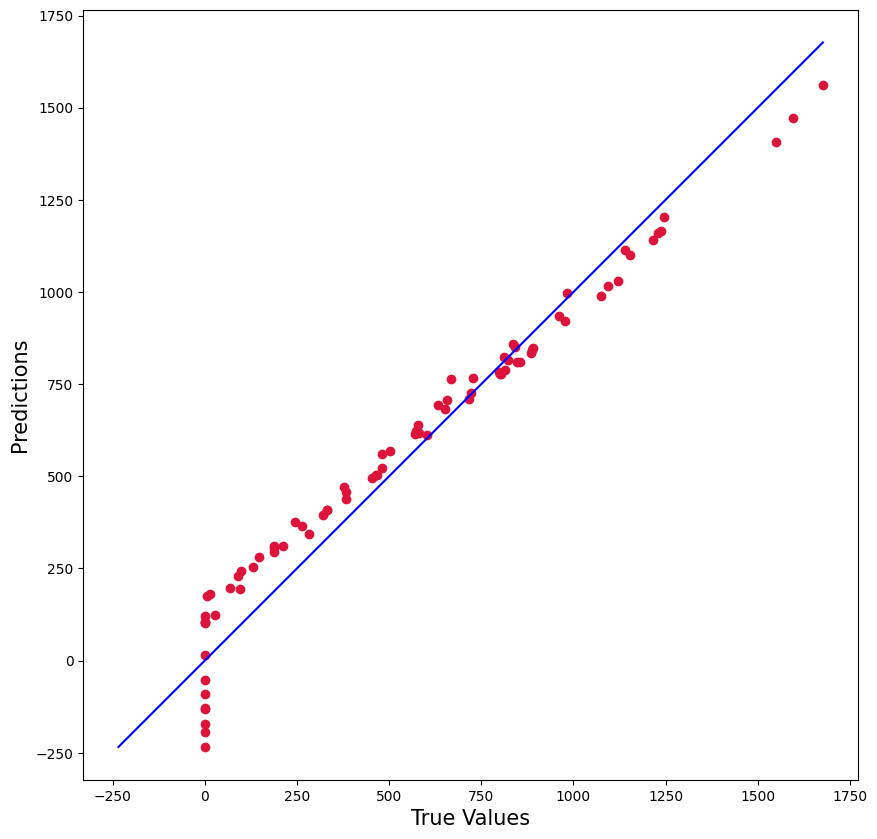

In [81]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, yhat, c='crimson')

p1 = max(max(yhat), max(y_test))
p2 = min(min(yhat), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


* La abundancia de observaciones en 0 de equilibrio afecta la forma en que el modelo se ajusta a los datos.

Elaboración de histograma para la variable Balance, con bins = 100

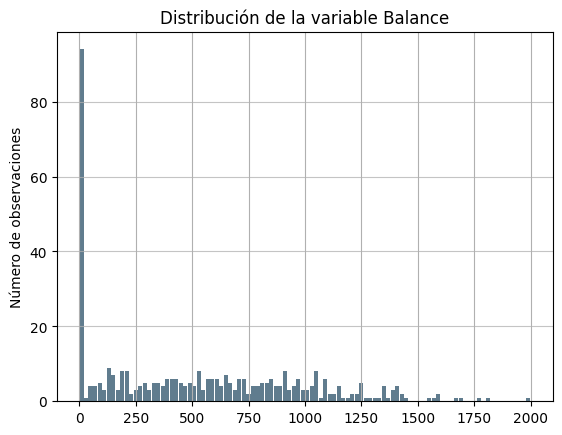

In [82]:
size, scale = 1000, 10

df.Balance.plot.hist(grid=True, bins=100, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribución de la variable Balance')
plt.xlabel('')
plt.ylabel('Número de observaciones')
plt.grid(axis='y', alpha=0.75)

Dummy: para identificar los ceros

In [248]:
df['Is_Zero'] = np.where(df['Balance']==0, 'Verdadero', 'Falso')
df['Is_Zero'].value_counts()

Falso        310
Verdadero     90
Name: Is_Zero, dtype: int64

De string a boolean

In [249]:
df['Is_Zero'] = df['Is_Zero'].map({'Verdadero': True, 'Falso': False})      # Replace string by boolean
df.head()


,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance,Gender,Married,Student,Asian,Caucasian,Is_Zero
46,47,19.531,5043,376,2,64,16,1241,0,0,0,1,0,False
36,37,62.413,6457,455,2,71,11,762,0,0,1,0,1,False
40,41,34.950,3327,253,3,54,14,50,0,1,1,0,0,False
120,121,27.241,1402,128,2,67,15,0,0,0,1,1,0,True
119,120,23.012,1410,137,3,81,16,0,1,1,1,0,1,True


División de conjuntos de datos de entrenamiento y de prueba

In [250]:
df_test = df.iloc[:n_holdout]
df_train = df.iloc[n_holdout:]

Modelo KNN 

In [251]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [252]:
X, y = df_train[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian","Balance"]], df_train.Is_Zero


GridSearch para la determinación de la K óptima

In [253]:
knn = KNeighborsClassifier()
k_range = list(range(1,10))
param_grid = dict(n_neighbors=k_range) 
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False, verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X, y)
print(grid_search.best_params_)


Fitting 10 folds for each of 9 candidates, totalling 90 fits
{'n_neighbors': 2}


El número óptimo es 2

In [254]:
knn_model = KNeighborsRegressor(n_neighbors=2)

X, y = df_train[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian","Balance"]], df_train.Is_Zero
knn_model.fit(X, y)

KNeighborsRegressor(n_neighbors=2)

R^2 

In [262]:
X_test, y_test = df_test[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian", "Balance"]], df_test.Is_Zero

In [256]:
r_squared = knn_model.score(X_test, y_test)
r_squared

0.86328125

Regresión lineal

In [272]:
X, y = df_train[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian", "Is_Zero"]], df_train.Balance
X_test, y_test = df_test[["Income", "Limit", "Rating", "Cards", "Age", "Education", "Gender", "Married", "Student", "Asian", "Caucasian", "Is_Zero"]], df_test.Balance
#initiate linear regression model
model.fit(X, y)

LinearRegression()

In [273]:
r_squared = model.score(X_test, y_test)
r_squared

0.97441940770812

* Mejoró la regresión lineal considerando la dummy de si es cero o no

Gráfico de residuales

In [278]:
import seaborn as sns

<AxesSubplot: xlabel='Balance'>

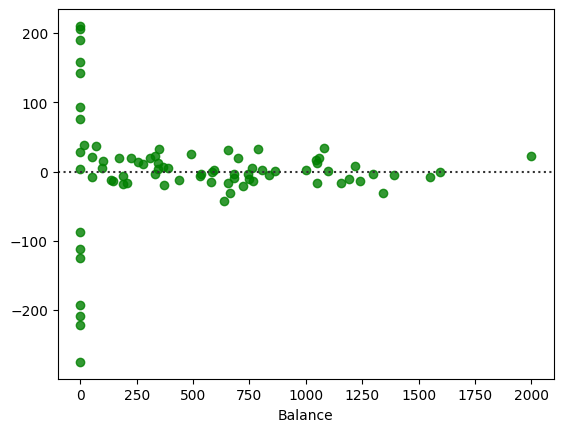

In [280]:
sns.residplot(x=y_test, y=yhat, color="g")